In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, cohen_kappa_score
import matplotlib.pyplot as plt
from joblib import dump

In [22]:
# Load Data
data = pd.read_csv('./data/clean_train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PartySize,Deck,PortStarboard
0,0001_01,Europa,False,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,P
1,0002_01,Earth,False,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,S
2,0003_01,Europa,False,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,A,S
3,0003_02,Europa,False,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,S
4,0004_01,Earth,False,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,S


## Decision Tree Classification

In [32]:
categorical_col = ['HomePlanet','Cabin','Destination','Deck','PortStarboard']

# Loop over categorical variables
for col in categorical_col :
    data[col] = data[col].astype('category')

In [33]:
data_cleaned = features.drop(features.loc[:,['PassengerId','Name']], axis=1)

In [41]:
#Seperate target from features
features = data.loc[:, data.columns != 'Transported']
target = data.loc[:,['Transported']]

# Remove unwanted columns
data_cleaned = features.drop(features.loc[:,['PassengerId','Name']], axis=1)

one_hot_encoded_data = pd.get_dummies(data_cleaned, columns = ['HomePlanet','Destination','Deck','PortStarboard','Cabin'])

In [42]:
#Split data into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, target, random_state=1234, train_size = .75)

In [43]:
X_train.dtypes

CryoSleep           bool
Age              float64
VIP                 bool
RoomService      float64
FoodCourt        float64
                  ...   
Cabin_996          uint8
Cabin_997          uint8
Cabin_998          uint8
Cabin_999          uint8
Cabin_unknown      uint8
Length: 1848, dtype: object

In [55]:
decision_tree = DecisionTreeClassifier()

model = decision_tree.fit(X_train, y_train) # fit the model using default parameters

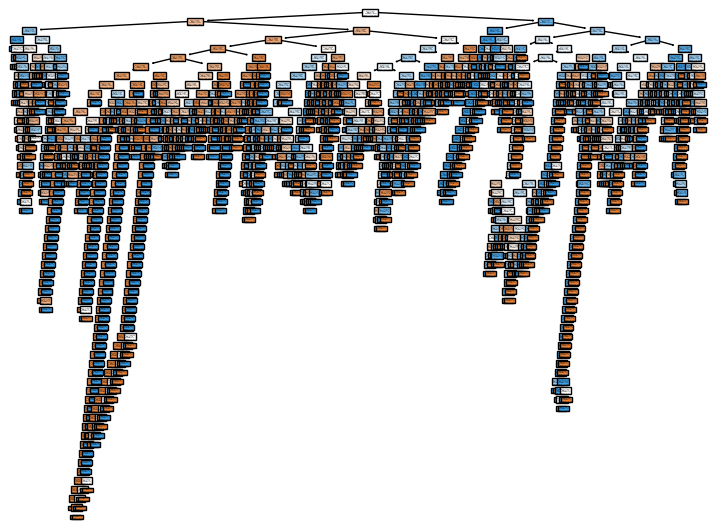

In [56]:
plt.figure()

plot_tree(model, filled=True)

plt.show()

In [57]:
y_prob = model.predict_proba(X_test)
y_pred = pd.DataFrame(y_prob > .5)

predictors = X_train.columns.values

In [58]:
confusion_matrix(y_test, model.predict(X_test))

array([[859, 237],
       [267, 811]])

In [59]:
# Calculate Accuracy Score on Validation Set
acc = accuracy_score(y_test, y_pred[1])
# Calculate F-score
f1 = f1_score(y_test, y_pred[1])
# Calculate Precision
prec = precision_score(y_test, y_pred[1])
# Calculate Recall
rec = recall_score(y_test, y_pred[1])
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred[1])

# Print Scores
print('Accuracy = ',acc)
print('F-Score = ',f1)
print('Precision = ', prec)
print('Recall = ', rec)
print('Kappa = ',kappa)

Accuracy =  0.7681692732290708
F-Score =  0.7629350893697083
Precision =  0.773854961832061
Recall =  0.7523191094619666
Kappa =  0.5362007690367061


Using the default parameters yields a model that slightly underperforms our best Logistic Regression model.  We will examine if optimizing the hyperparameter settings can improve model performance.

In [ ]:
# Hyperparameter Dictionary
param_dict = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,10)
}

model_gs = GridSearchCV(decision_tree, param_grid = param_dict, cv=5, verbose=1, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


In [ ]:
model_gs.best_params_

In [ ]:
model_gs.best_score_

In [ ]:
best_model_dt = model_gs.best_estimator_
dump(best_model_dt, './models/dt.joblib')

In [ ]:
# Evaluation of best model
y_pred = best_model_dt.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
# Calculate Accuracy Score on Validation Set
acc = accuracy_score(y_test, y_pred[1])
# Calculate F-score
f1 = f1_score(y_test, y_pred[1])
# Calculate Precision
prec = precision_score(y_test, y_pred[1])
# Calculate Recall
rec = recall_score(y_test, y_pred[1])
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred[1])

# Print Scores
print('Accuracy = ',acc)
print('F-Score = ',f1)
print('Precision = ', prec)
print('Recall = ', rec)
print('Kappa = ',kappa)